# Regresión Logística
- Es un tipo de análisis de regresión, utilizado para predecir el resultado de una variable categórica ( una varaible que puede adoptar un número de categorías) en función de otras variables independientes.
- Es útil para modelar la probabilidad de que un evento pueda ocurrir en función de otros factores.
- Es un método de clasificación probabilística, por ejemplo, para clasificar los correros según sean válidos o no, para clasificar a las personas que solicitan un préstamo según lo puedan pagar o no, o para clasificar a las personas según tenga o no una enfermedad concreta.
- Estos ejemplos, son ejemplos de clasificación binaria, en las que sólo hay dos catergorías posibles.

    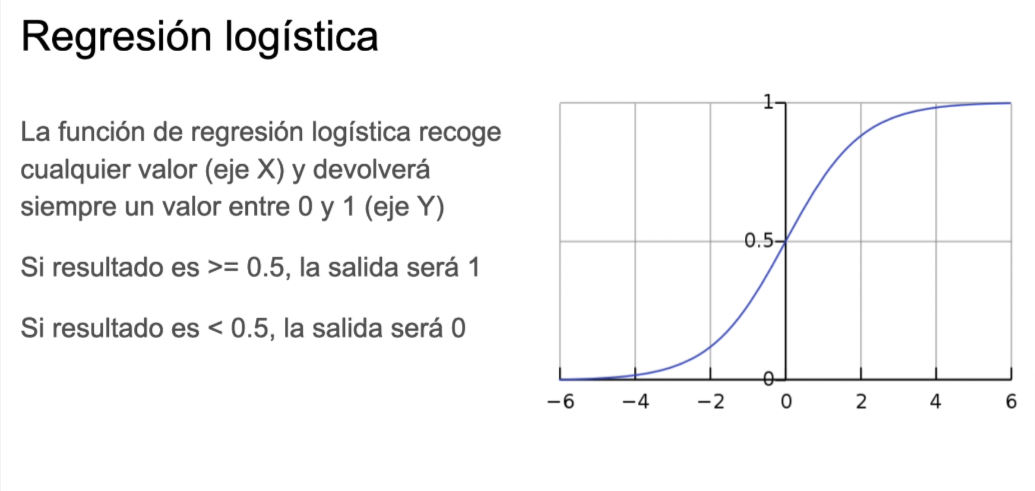

- Una matriz de confusión sirve para evaluar nuestro modelo de regresión logística.
- Ejemplo de una matriz de confusión para unas pruebas de detección de spam:

    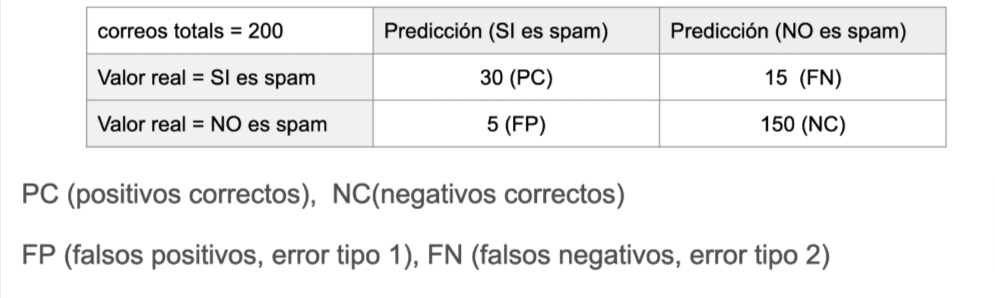

- La precisión sirve para saber la probabilidad de acierto en la predición de un modelo.
    - `Precisión = (Positivos correctos + Negativos correctos) / Total de predicciones`

- La tasa de error siver para saber la probabilidad de error en la predición de un modelo.
    - `Tasa de error = (Falsos positivos + Falsos negativos) / Total de predicciones`

---


In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [236]:
entrenamiento = pd.read_csv('train.csv')
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

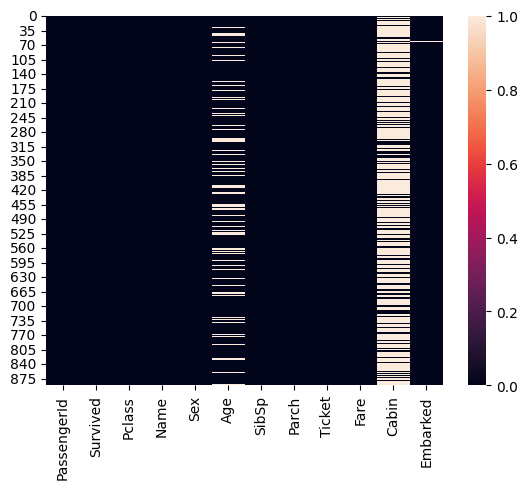

In [237]:
sns.heatmap(entrenamiento.isnull()) # Visualizar los datos de entrenamiento con valores nulos

<Axes: xlabel='Survived', ylabel='count'>

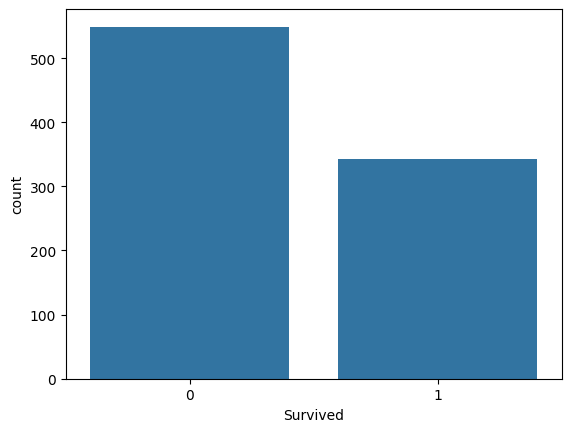

In [238]:
sns.countplot(x='Survived', data=entrenamiento)

<Axes: xlabel='Survived', ylabel='count'>

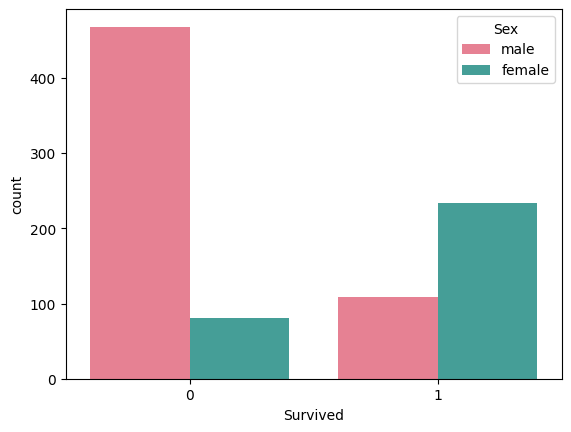

In [239]:
sns.countplot(x='Survived', data=entrenamiento, hue='Sex', palette='husl')

<Axes: xlabel='Survived', ylabel='count'>

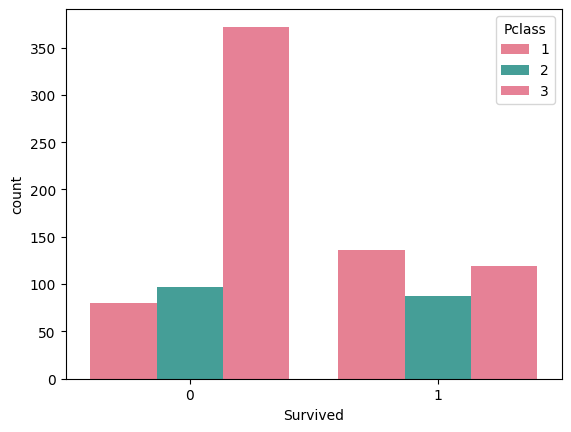

In [240]:
sns.countplot(x='Survived', data=entrenamiento, hue='Pclass', palette='husl')

<Axes: xlabel='Age', ylabel='Count'>

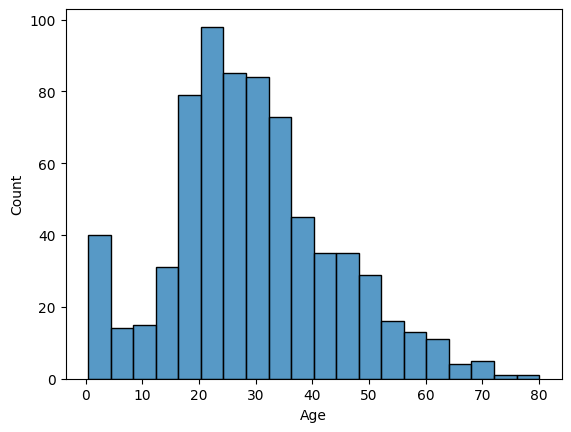

In [241]:
sns.histplot(entrenamiento['Age'].dropna(), kde=False, bins=20)

<Axes: ylabel='Frequency'>

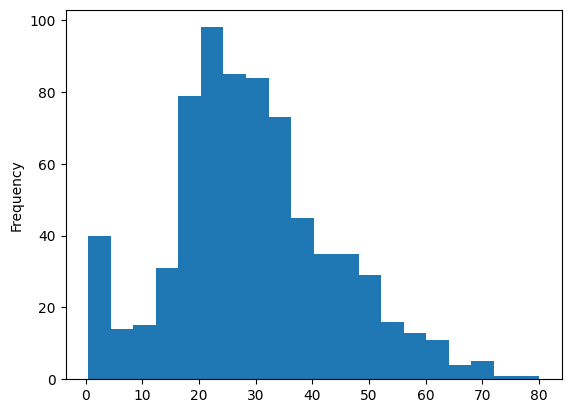

In [242]:
entrenamiento['Age'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

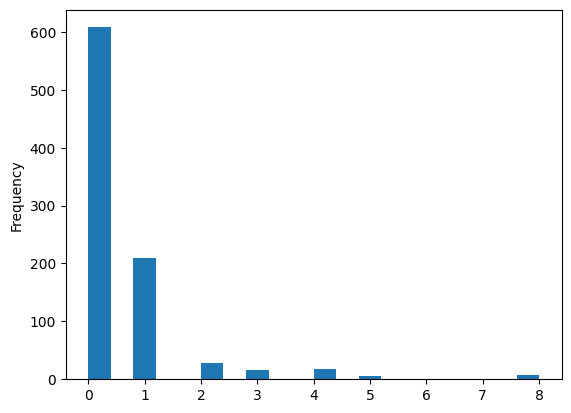

In [243]:
entrenamiento['SibSp'].plot.hist(bins=20)

---
Limpieza de datos

<Axes: >

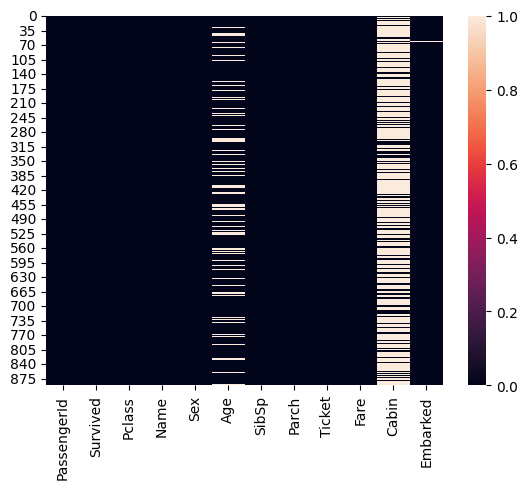

In [244]:
sns.heatmap(entrenamiento.isnull()) # Visualizar los datos de entrenamiento con valores nulos

<Axes: xlabel='Pclass', ylabel='Age'>

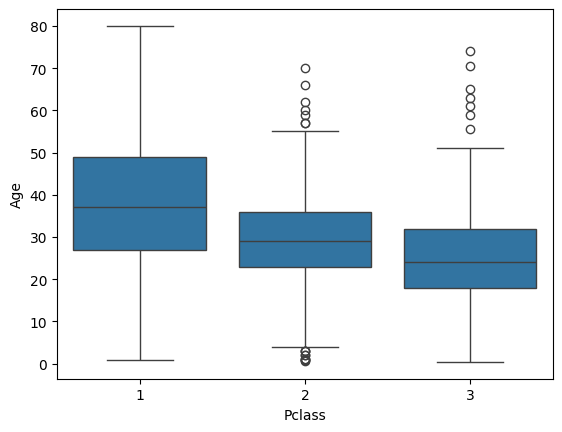

In [245]:
# Edad sustituimos por el valor medio de la edad de la clase por los valores nulos

sns.boxplot(x='Pclass', y='Age', data=entrenamiento)

In [246]:
def edad_media(columnas):
    #edad = columnas[0]
    #clase = columnas[1]
    edad = columnas.iloc[0]  # Acceder a la primera posición con iloc
    clase = columnas.iloc[1]  # Acceder a la segunda posición con iloc
    
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25
    else:
        return edad

In [247]:
entrenamiento['Age'] = entrenamiento[['Age','Pclass']].apply(edad_media, axis=1)

<Axes: >

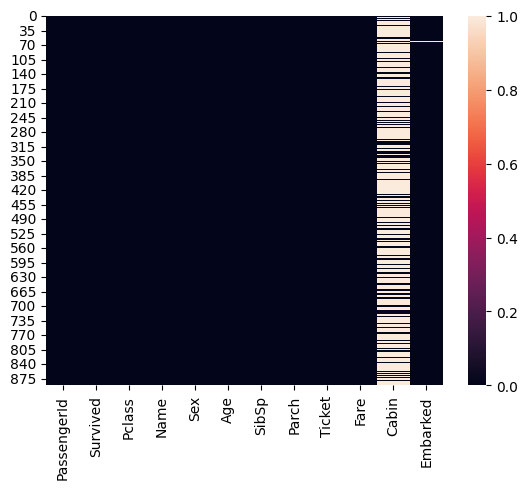

In [248]:
sns.heatmap(entrenamiento.isnull()) # Visualizar los datos de entrenamiento con valores nulos

In [249]:
entrenamiento.drop('Cabin', axis=1, inplace=True) # Eliminar la variable 'Cabin' pq tiene la mayoria de dato null y no aporta.

<Axes: >

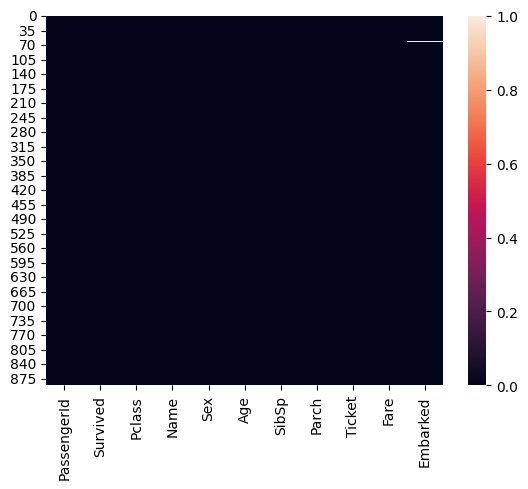

In [250]:
sns.heatmap(entrenamiento.isnull()) # Visualizar los datos de entrenamiento con valores nulos

In [251]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [252]:
# Nos quedamos con las columnas numéricas

entrenamiento.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [253]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [254]:
# Convertimos los valores de sex a 0 y 1
sexo = pd.get_dummies(entrenamiento['Sex'], drop_first=True).astype(int)


In [255]:
# Insertamos la nueva columna
entrenamiento = pd.concat([entrenamiento, sexo], axis=1)
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [256]:
entrenamiento.drop('Sex', axis=1, inplace=True)
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [257]:
# Hacemos lo mismo con Embarked
puerto = pd.get_dummies(entrenamiento['Embarked'], drop_first=True).astype(int)
puerto.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [258]:
entrenamiento = pd.concat([entrenamiento, puerto], axis=1)
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [259]:
entrenamiento.drop('Embarked', axis=1, inplace=True)
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


---
Entrenamiento del modelo

In [260]:
y = entrenamiento['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [261]:
X = entrenamiento.drop(['Survived'], axis=1)
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [262]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [263]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
248,1,37.0,1,1,52.5542,1,0,1
197,3,42.0,0,1,8.4042,1,0,1
133,2,29.0,1,0,26.0000,0,0,1
169,3,28.0,0,0,56.4958,1,0,1
736,3,48.0,1,3,34.3750,0,0,1
...,...,...,...,...,...,...,...,...
422,3,29.0,0,0,7.8750,1,0,1
815,1,38.0,0,0,0.0000,1,0,1
466,2,30.0,0,0,0.0000,1,0,1
559,3,36.0,1,0,17.4000,0,0,1


In [264]:
y_train

650    0
784    0
125    1
54     0
446    1
      ..
725    0
607    1
544    0
643    1
414    1
Name: Survived, Length: 623, dtype: int64

In [265]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
248,1,37.0,1,1,52.5542,1,0,1
197,3,42.0,0,1,8.4042,1,0,1
133,2,29.0,1,0,26.0000,0,0,1
169,3,28.0,0,0,56.4958,1,0,1
736,3,48.0,1,3,34.3750,0,0,1
...,...,...,...,...,...,...,...,...
422,3,29.0,0,0,7.8750,1,0,1
815,1,38.0,0,0,0.0000,1,0,1
466,2,30.0,0,0,0.0000,1,0,1
559,3,36.0,1,0,17.4000,0,0,1


In [266]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [267]:
predicciones = modelo.predict(X_test)
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [268]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
422    0
815    0
466    0
559    1
6      0
Name: Survived, Length: 268, dtype: int64

In [269]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.78      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.83      0.83       268



In [270]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[152,  26],
       [ 20,  70]])